<a href="https://colab.research.google.com/github/wallik2/DeepLearningAndrewNG/blob/ch4_cnn/01_Grayscale_Image_Edge_detection_using_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LEARN HOW IT WORKS

In [1]:
import numpy as np
from matplotlib import pyplot as plt

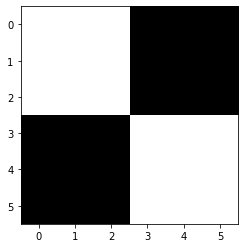

In [2]:
img_arr = np.array([[10,10,10, 0 ,0 ,0],
                    [10,10,10, 0 ,0 ,0],
                    [10,10,10, 0 ,0 ,0],
                    [0,0,0,10 ,10 ,10],
                    [0,0,0,10 ,10 ,10],
                    [0,0,0,10 ,10 ,10]]
                    )

plt.imshow(img_arr, cmap='gray', vmin=0, vmax=10) # let 10 as pixel value : 255
plt.show()

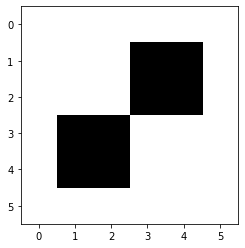

In [3]:
img_arr = np.array([[10,10,10,10,10,10],
                    [10,10,10, 0 ,0 ,10],
                    [10,10,10, 0 ,0 ,10],
                    [10,0,0,10 ,10 ,10],
                    [10,0,0,10 ,10 ,10],
                    [10,10,10,10 ,10 ,10]]
                    )

plt.imshow(img_arr, cmap='gray', vmin=0, vmax=10)   # 10 as scale 255
plt.show()

In [4]:
# Let's try all possible filters from 
# https://stackoverflow.com/questions/17078131/why-sobel-operator-looks-that-way/17083388?fbclid=IwAR0B2C0dFNO1kEAVXo36b9QgaKdQMstzu8eaXx3l53X1FP_uMp3nyiDdSmc#17083388

simple_filter  = np.array([[1,-1]])

prewitt_vecv_filter = np.array([[1,0,-1]])

prewitt_v_filter  = np.array([[1,0,-1],
                              [1,0,-1],
                              [1,0,-1]])

sobel_v_filter = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

scharr_v_filter  =  np.array([[3,0,-3],
                              [10,0,-10],
                              [3,0,-3]])

why 1 and -1 (when doing convolution, it simply summation of the elementwise product.. doing things like this is like subtraction between the 2 pixel value where the filter capture)

In [5]:
# filter = np.array([1,0,-1]).reshape([1,3])

def edge_detector(filter, img_arr , pad = 0, stride = 1):

    f_nrow , f_ncol = (filter.shape[0] , filter.shape[1])

    img_nrow , img_ncol       = (img_arr.shape[0], img_arr.shape[1])

    output_nrow , output_ncol =  (img_nrow - f_nrow + 1 , img_ncol - f_ncol + 1)

    output = np.zeros((output_nrow,output_ncol))

    for i in range( output_nrow ):   # nx - fx + 1
        for j in range( output_ncol ):  # ny - fy + 1
            loc_img = img_arr[ i:i+f_nrow , j: j+f_ncol ]
            trnsfrm_loc_img = loc_img * filter
            edge_strngth = trnsfrm_loc_img.sum()
            output[i,j] = edge_strngth
    return output

In [ ]:
filter = prewitt_vecv_filter

output = edge_detector(filter,img_arr)
print(output)
plt.imshow(output, cmap='gray')
plt.show()

^ There are interpretations like this

- Some of pixel value of output are 20 or 10 (the reason there are 10 is it got noise from another row 

- Some of pixel value of output are 20 or -20 (the negative represent the transition from dark pixel to light pixel, while positive represent light to dark) [Why? : dark pixel value have lower in pixel value, so when subtract with something higher in pixel value (like light), the subtraction is simply negative

eg. 0 - 10 = -10 (dark to light) <br>
    10 - 0 = 10 (light to dark)


Seem like you don't like noise from another row, may be we can change filter from matrix to vector, so...

[[  0.   0.   0.   0.]
 [  0.  10.  10. -10.]
 [  0.  10.  10. -10.]
 [ 10. -10. -10.   0.]
 [ 10. -10. -10.   0.]
 [  0.   0.   0.   0.]]


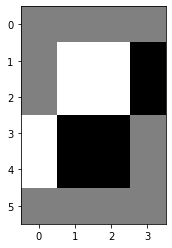

In [10]:
filter = prewitt_vecv_filter

output = edge_detector(filter,img_arr)
print(output)
plt.imshow(output, cmap='gray')
plt.show()

Theorically, noise from other rows are useful when doing cnn. Moreover, it take less time to convolve using matrix filter instead of vector filter

But again, it seems unfair to get the noise from another row too, so sober, scharr were designed to give more weight to that particular central pixel value 

**Let's try another more simplier grayscale image**

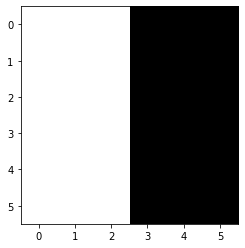

In [14]:
v = np.array([[10,10,10, 0 ,0 ,0]])    # better way to generate matrix from vector
m = 6
img_arr = np.tile(v,(m,1))

plt.imshow(img_arr, cmap='gray', vmin=0, vmax=10) # let 10 as pixel value : 255
plt.show()

^ we expect the edge strength will be at the middle in x axis (right?)

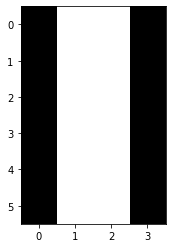

In [12]:
output = edge_detector(prewitt_vecv_filter,img_arr)
plt.imshow(output, cmap='gray')

I know it seems confusing why the output have two pixel instead of one..

When using odd filter will give the edge strength near the particular central pixel instead of actually edge between pixel which done by even filter



---



## SETUP ALL WHAT WE LEARNT

All code in this section will no longer relavant to the above one

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
# Next : Try picture from internet (say spoink) (compare )

In [17]:
def import_img(url):
    from PIL import Image
    import requests
    import matplotlib.image as mpimg

    img = Image.open(requests.get(url, stream=True).raw)
    img = np.array(img)
    return img

def rgb2gray(img):
    
    greyimg = img.mean(axis=2,keepdims=False)/255.0
    return greyimg


url = "https://animefillerlists.com/wp-content/uploads/2022/04/Spoink.jpg" #@param ["https://cdn.pixabay.com/photo/2017/05/17/12/42/tiger-2320819_960_720.jpg", "https://animefillerlists.com/wp-content/uploads/2022/04/Spoink.jpg", "https://archives.bulbagarden.net/media/upload/thumb/f/fa/Spoink_anime.png/1200px-Spoink_anime.png"] {allow-input: true}
img = import_img(url)
greyimg = rgb2gray(img)

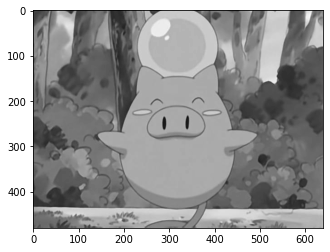

In [18]:
plt.imshow(greyimg,cmap='gray')

In [19]:
v_vector_filter = np.array([[1,0,-1]])
v_filter = np.array([[1,0,-1],
                     [1,0,-1],
                     [1,0,-1]] )
sobel_v_filter = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])
scharr_v_filter  =  np.array([[3,0,-3],
                              [10,0,-10],
                              [3,0,-3]])
scharr_custom_v_filter =   np.array([[3,0,-3],
                                    [3,0,-3],
                                    [3,0,-3]])
scharr_vector_filter = np.array([[10,0,-10]])


inverse_scharr_v_filter = scharr_v_filter * -1

manual_filter = np.array([[2,0,-2]])

In [20]:
filter_name = "scharr_v_filter" #@param ["v_vector_filter", "v_filter", "sobel_v_filter", "scharr_v_filter", "scharr_vector_filter", "scharr_custom_v_filter", "inverse_scharr_v_filter", "manual_filter"]
filter = globals()[filter_name]

def edge_detector(filter, img_arr , pad = 0, stride = 1):

    f_nrow , f_ncol = (filter.shape[0] , filter.shape[1])

    img_nrow , img_ncol       = (img_arr.shape[0], img_arr.shape[1])

    output_nrow , output_ncol =  (img_nrow - f_nrow + 1 , img_ncol - f_ncol + 1)

    output = np.zeros((output_nrow,output_ncol))

    for i in range( output_nrow ):   # nx - fx + 1
        for j in range( output_ncol ):  # ny - fy + 1
            loc_img = img_arr[ i:i+f_nrow , j: j+f_ncol ]           
            trnsfrm_loc_img = loc_img * filter
            edge_strngth = trnsfrm_loc_img.sum()
            output[i,j] = edge_strngth
    return output

# DO NOT CHANGE OTHER THAN THIS : PAD = 0 , STRIDE = 1

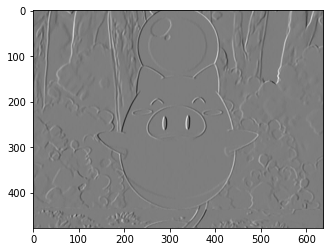

filter : scharr_v_filter
Maximum edge strength 8.141176470588235
Minimum edge strength -7.894117647058823


In [21]:
output = edge_detector(filter,greyimg)

plt.imshow(output,cmap='gray')
plt.show()

print(f'filter : {filter_name}')
print(f'Maximum edge strength {output.max()}')
print(f'Minimum edge strength {output.min()}')

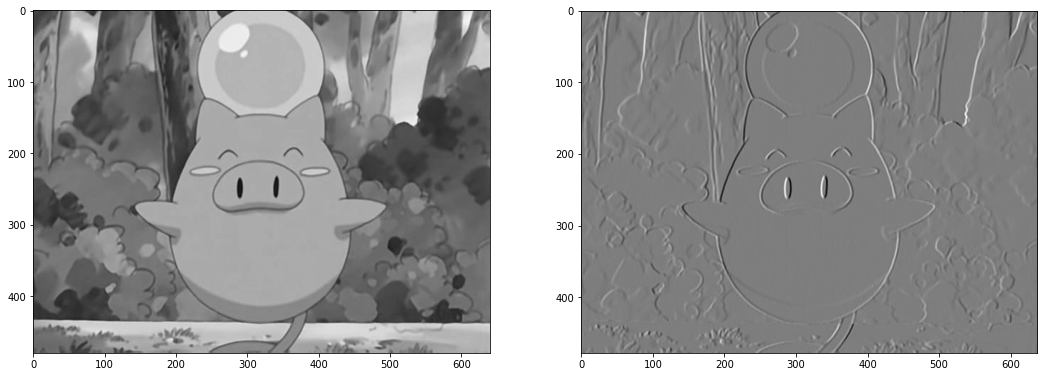

In [31]:
fig = plt.figure(figsize=(18, 16))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(greyimg,cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(output,cmap='gray')
plt.show()